# Player's Performance Reviewer

### To conclude the following points, EDA is used: -

- World statistics
- Clustering players by Nationality
- Value & Wages of players with age
- Value of players with position
- Overall & Potential with age
- Variation of overall & potential by country for top countries
- Correlation matrix - attributes vs potential and overall
- Variation in wages for top clubs
- Age vs overall clustered by field position
- Make your dream team
- Predicting playing position using player statistics

In [1]:
## Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno   ## Offers a very nice way to visuaize the distribution of non values
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
### Setting up the background style for the plots
plt.style.use('fivethirtyeight')

### Reading the Data

In [3]:
## Reading the data and also checking the computation time.

data = pd.read_csv("Fifa_Players_performance.csv")
%time data
print(data.shape)   ## Shape of the dataset

CPU times: total: 0 ns
Wall time: 0 ns
(18207, 89)


In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
## Lets check the column names present in the data.
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Data Cleaning

##### Data cleaning is crucial and amphasized because wrong data can drive a business to wrong decisions, conclusions and pool analysis eapecially if the huge quantities of big data are into picture. The model trained with this data would thus learn from this wrong data and hence would show anomalous behaviou.

In [6]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
data.iloc[0:5]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
data.iloc[:,2:].describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [9]:
## Checking the players with preferred foot.
data['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [10]:
data.iloc[:,13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,...,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,...,660,660,660,713,669,634,634,634,669,557


In [11]:
data.isnull().sum()
## isnull----> Used to find the values

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [12]:
data.iloc[:,:60].isnull().sum()
## isnull----> Used to find the values

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

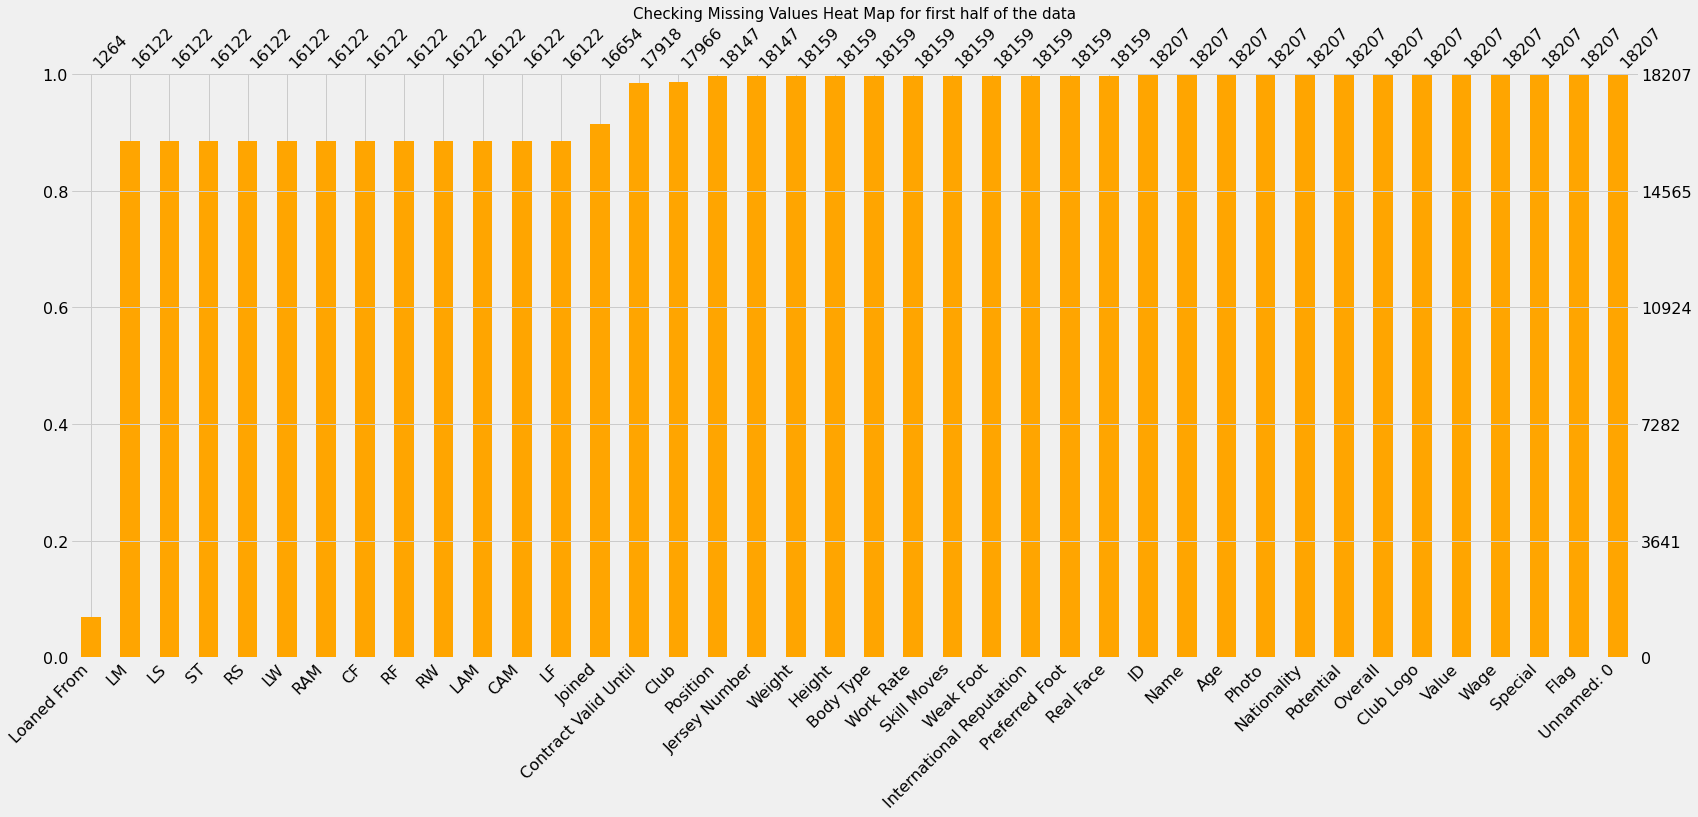

In [13]:
## Checking if the data contains ant Null values
## Visualize missing values as a metrix 
## Checking missing values for first half of the data

mno.bar(data.iloc[:,:40],
       color = 'orange',
       sort = 'ascending')
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

In [14]:
data.shape

(18207, 89)

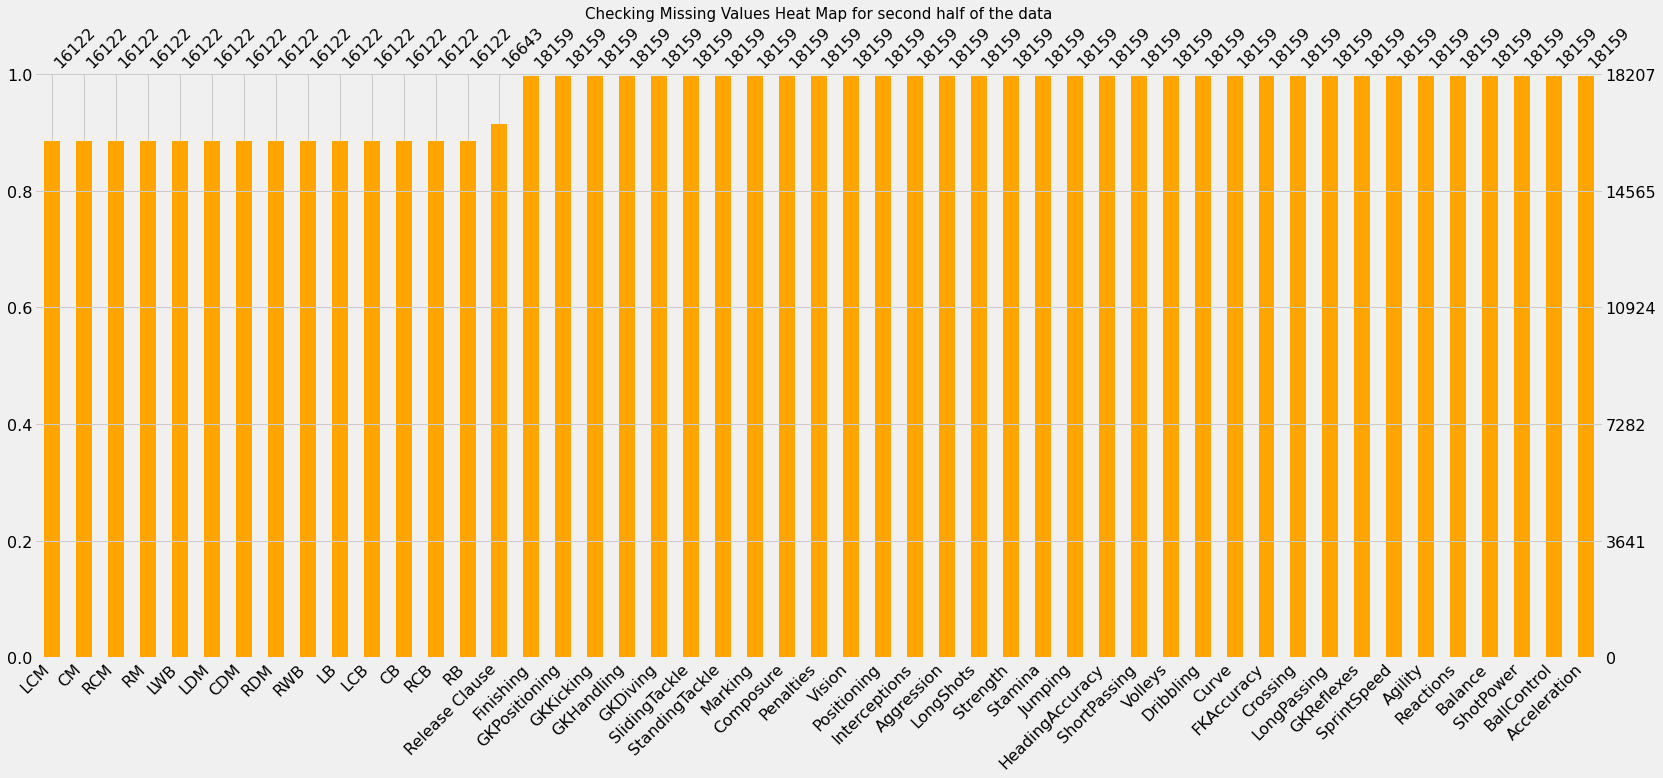

In [15]:
## Checking if the data contains ant Null values
## Visualize missing values as a metrix 
## ## Checking missing values for second half of the data

mno.bar(data.iloc[:,40:],
       color = 'orange',
       sort = 'ascending')
plt.title('Checking Missing Values Heat Map for second half of the data', fontsize = 15)
plt.show()

##### missingno = missing+no---> use to visualize missing values
##### fillna = fill+na(null)---> use to fill the null values

### Missing Values Inputation

In [16]:
## Filling the missing values for the continous variable for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].median(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna("200lbs", inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Loaned From'].fillna("None", inplace = True)
data['Joined'].fillna("Jul 1, 2018", inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna("Normal", inplace = True)
data['Position'].fillna("ST", inplace = True)
data['Club'].fillna("No Club", inplace = True)
data['Work Rate'].fillna("Medium/ Medium", inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna("Right", inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Club'].fillna("No Club", inplace = True)
data['Club'].fillna("No Club", inplace = True)
data['Wage'].fillna("€200K", inplace = True)

In [17]:
## Impute with 0 with rest of the columns
## fillna---> fill+nulls
data.fillna(0, inplace= True)

## Lets check whether the data still has any missing values 
data.isnull().sum().sum()

0

In [18]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Feature Engineering

##### It is the process of using domain knowledge to extract features from raw data via data mining techniques.

##### These featuress can be used to imporove the performance of  machine learning algorithms. Feature engineering can be considered   as applied machine learning itself.

In [19]:
(data[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()

46.75670529649769

In [20]:
## Creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential','Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean()).mean()))

In [21]:
## Adding these categories to the data.

data['Defending'] = data.apply(defending, axis= 1)
data['General'] = data.apply(general, axis= 1)
data['Mental'] = data.apply(mental, axis= 1)
data['Passing'] = data.apply(passing, axis= 1)
data['Mobility'] = data.apply(mobility, axis= 1)
data['Power'] = data.apply(power, axis= 1)
data['Rating'] = data.apply(rating, axis= 1)
data['Shooting'] = data.apply(shooting, axis= 1)

In [22]:
## Lets check the column names in the data after adding new features
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [23]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


### Data Visualization

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

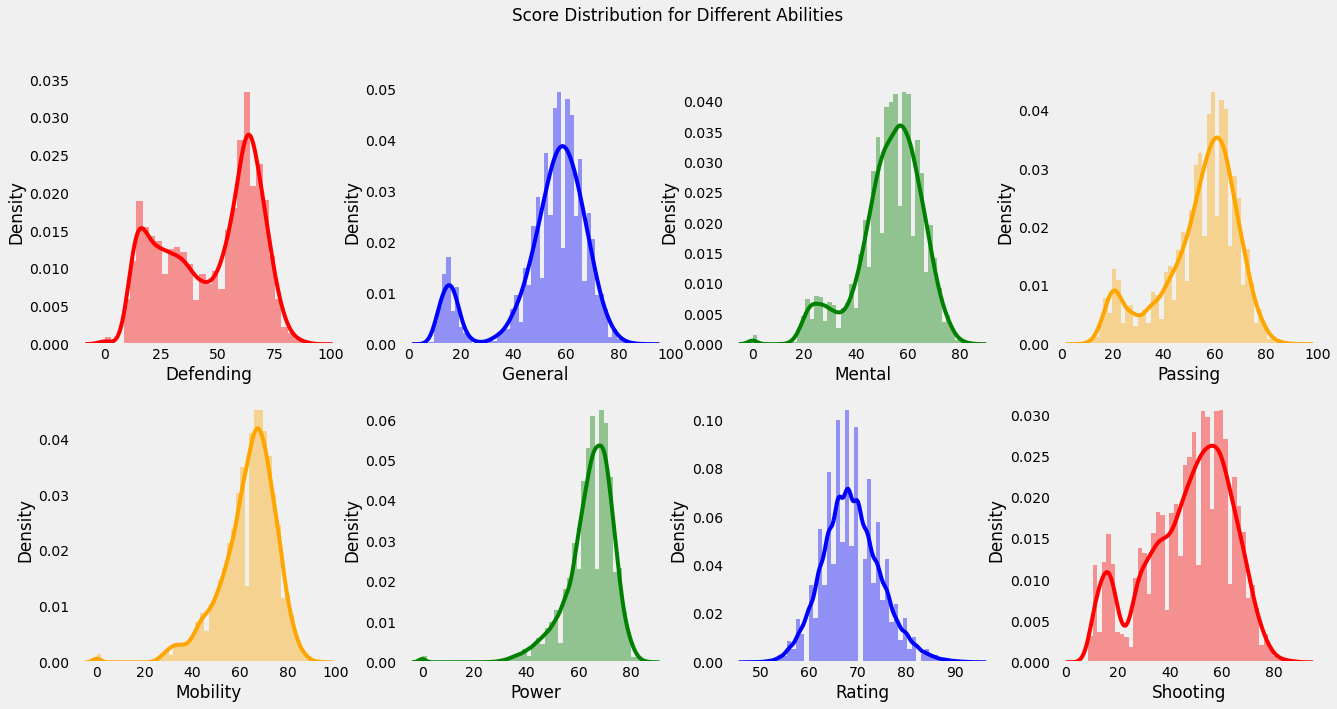

In [24]:
## Lets check the distribution of scores of different skills

plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(2,4,1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'], color = 'blue')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'], color = 'green')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Passing'], color = 'orange')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'], color = 'orange')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Power'], color = 'green')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Rating'], color = 'blue')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.suptitle('Score Distribution for Different Abilities')
plt.show()

In [25]:
data['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

C:\Users\guru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


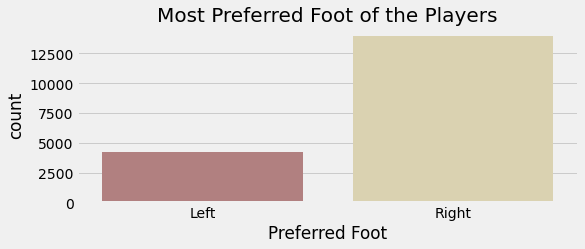

In [26]:
## Comparision of preferred foot over the different players.

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

In [27]:
data['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

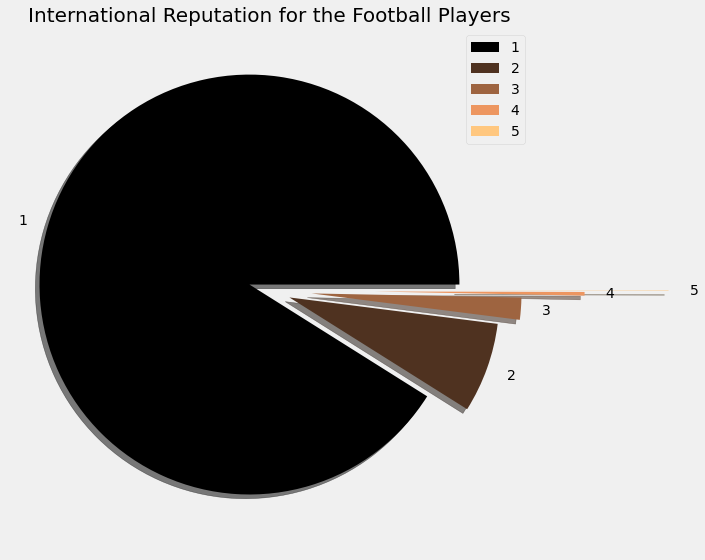

In [28]:
## Plotting a pie chart to represent share of international reputation

labels = ['1','2','3','4','5'] ## data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Reputation for the Football Players', fontsize = 20)
plt.legend()
plt.show()
## Only few players has 5 star International Reputation.

#### Let's check the Players with International Reputation as 5.

In [29]:
data[data['International Reputation'] == 5][['Name','Nationality',
                                'Overall', 'Preferred Foot', 'International Reputation']].sort_values(by = 'Overall', 
                                                ascending = False).style.background_gradient(cmap = 'magma') 
## Most reputed players details.

,Name,Nationality,Overall,Preferred Foot,International Reputation
0,L. Messi,Argentina,94,Left,5.000000
1,Cristiano Ronaldo,Portugal,94,Right,5.000000
2,Neymar Jr,Brazil,92,Right,5.000000
7,L. Suárez,Uruguay,91,Right,5.000000
22,M. Neuer,Germany,89,Right,5.000000
109,Z. Ibrahimović,Sweden,85,Right,5.000000


In [30]:
data['Weak Foot']

0        4.0
1        4.0
2        5.0
3        3.0
4        5.0
        ... 
18202    2.0
18203    2.0
18204    3.0
18205    3.0
18206    3.0
Name: Weak Foot, Length: 18207, dtype: float64

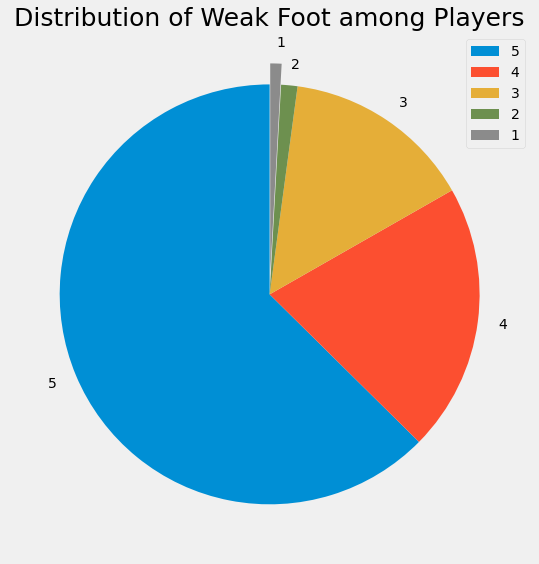

In [31]:
## Plotting a pie chart to represent share of weak foot players

labels = ['5','4','3','2','1']
size = data['Weak Foot'].value_counts()

explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, explode = explode, shadow = False, startangle = 90)
plt.title('Distribution of Weak Foot among Players', fontsize = 25)
plt.legend()
plt.show()

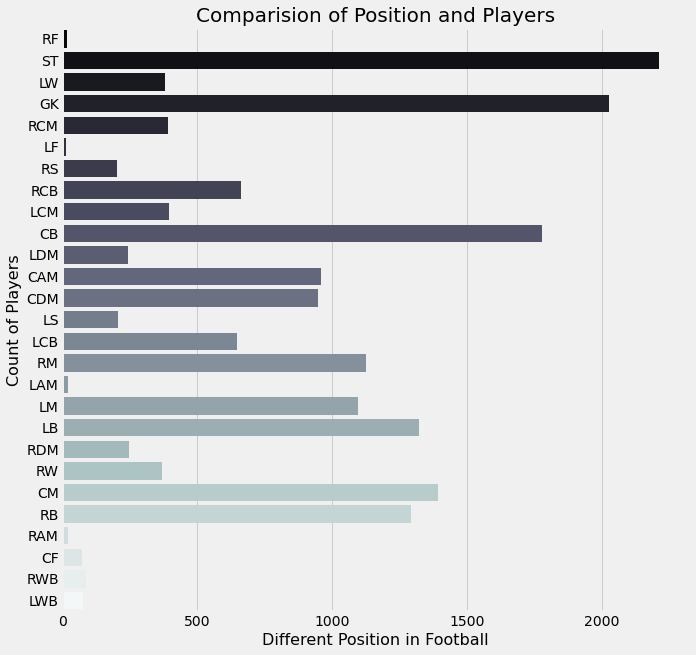

In [32]:
## Different position acquired by the players 

plt.figure(figsize = (10, 10))
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Position in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparision of Position and Players', fontsize = 20)
plt.show()
## From below graph we can say that the most of the players play for striker and goal keeper position

In [33]:
data['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


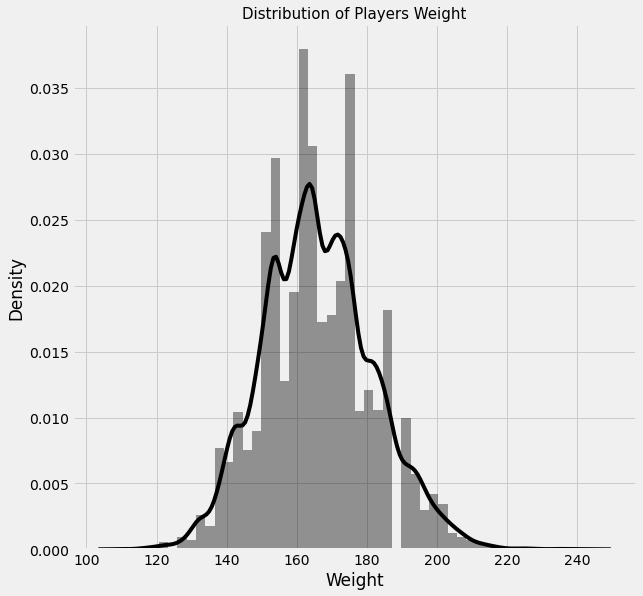

In [34]:
## Defining a function for cleaning the weight data.

def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)

## Applying the function to weight column
## data['value'] = data['value'].apply(lambda x : extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

## Plotting the distribution of weight of the players 
plt.style.use('fivethirtyeight')
sns.distplot(data['Weight'], color = 'black')
plt.title('Distribution of Players Weight', fontsize = 15)

plt.show()

In [35]:
data['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [36]:
## Defining a function for cleaning the wage column.

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in out:
        out = float(out.replace('K', ''))*1000
    return float(out)

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


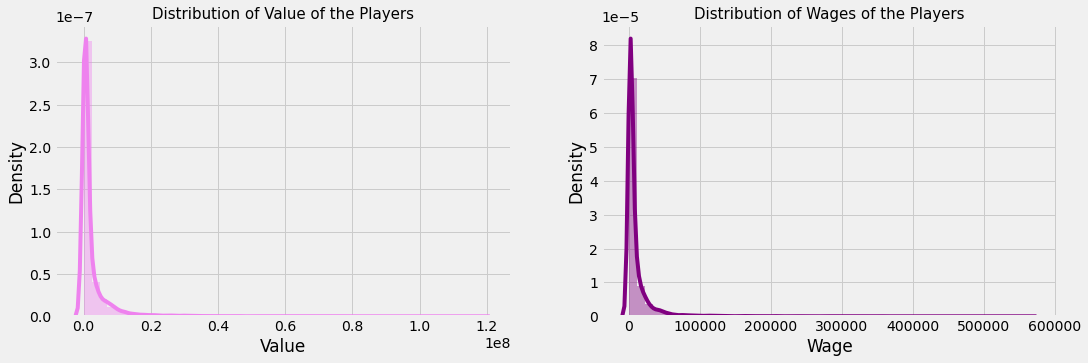

In [37]:
## Applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x : extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x : extract_value_from(x))

## Visualizing the data 

plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1,2,1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

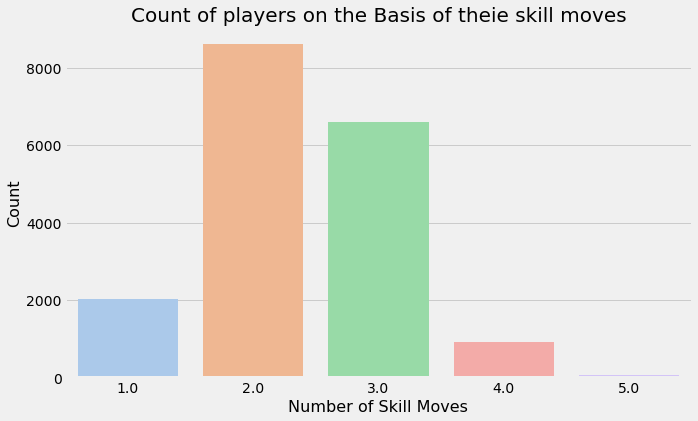

In [38]:
## Skill moves of players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of players on the Basis of theie skill moves', fontsize = 20)
plt.show()

In [39]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age', 'Skill Moves']]

,Name,Age,Skill Moves
25,K. Mbappé,19,5.0
1004,J. Sancho,18,5.0
1143,Vinícius Júnior,17,5.0
2495,M. Ødegaard,19,5.0


In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

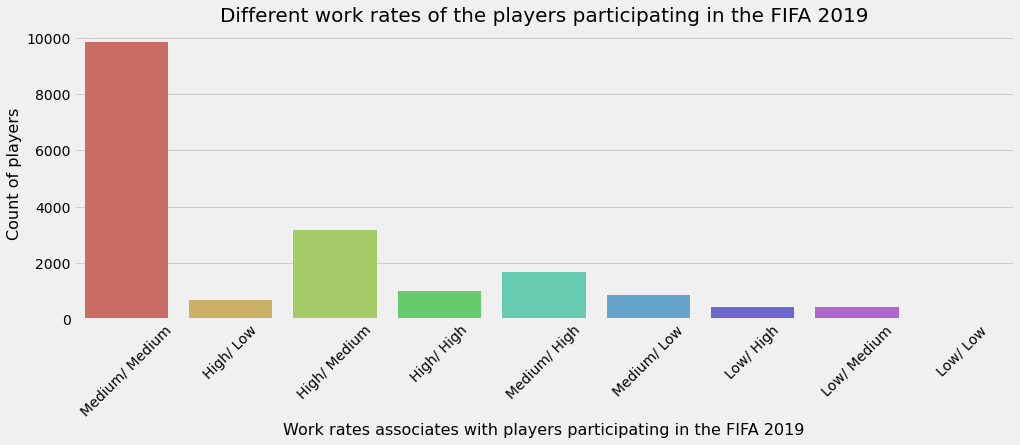

In [41]:
## To show different work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 5))
#plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the players participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associates with players participating in the FIFA 2019', fontsize = 16)
plt.ylabel('Count of players', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()
## You will infer that the work rate is midium for maximum players.

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


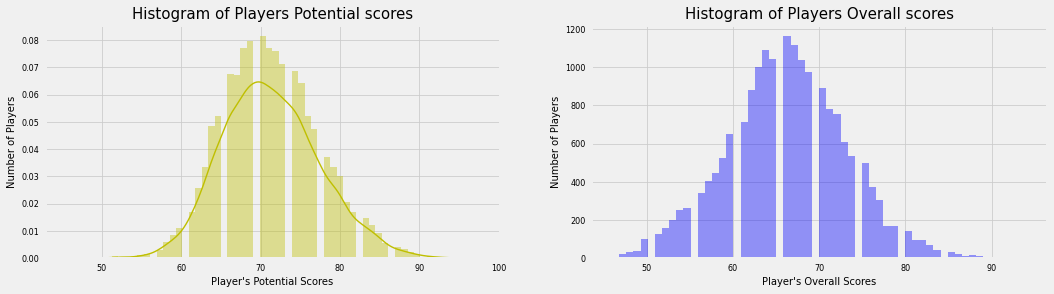

In [42]:
## To show different potential score of the players participating in the FIFA 2019

plt.figure(figsize = (16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1,2,1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 10)
ax.set_title(label = 'Histogram of Players Potential scores', fontsize = 15)

plt.subplot(1,2,2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'b')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 10)
ax.set_title(label = 'Histogram of Players Overall scores', fontsize = 15)
plt.show()

## Player's potential and overall scores:-
## You will infer that the maximum players has a high potential range from 65 to 75.
## Also the overall score is in the range 60 to 70 for most of the players.

#### Box Plot

C:\Users\guru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


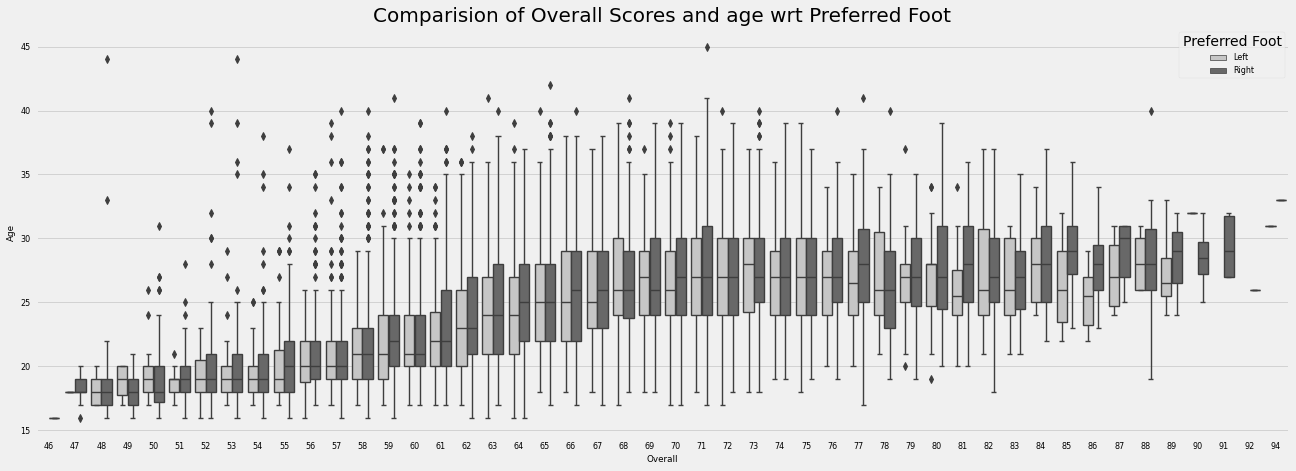

In [43]:
## Box plot

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparision of Overall Scores and age wrt Preferred Foot', fontsize = 20)
plt.show()

## Boxplot ware usually the standarized way to display the distribution of data.
## You will infer that the overall score is high and distributed from the age 22 to 28 with preferred foot as right. 

### Countries with most Players.

In [44]:
data['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

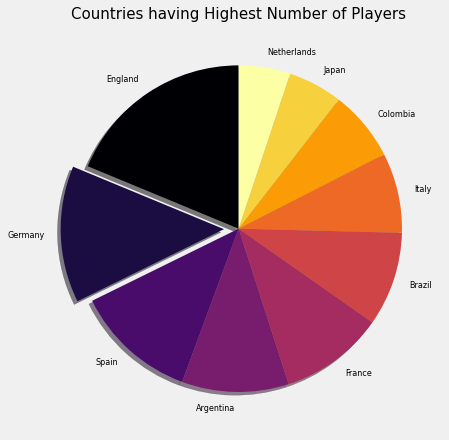

In [45]:
## Picking up the countries with highest number of players to compare their overall scores.

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                                startangle = 90, shadow = True, explode = [0, 0.09, 0, 0, 0, 0, 0, 0, 0, 0])
plt.title('Countries having Highest Number of Players', fontsize = 15)
plt.axis('off')
plt.show()
## Germany and England has highest number of players

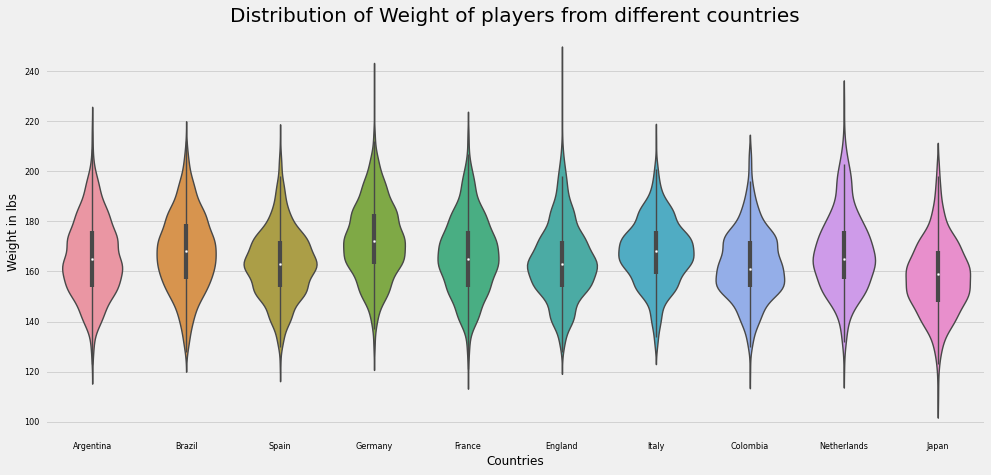

In [46]:
 ## Every Nations' palyers and their weight

some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'])
ax.set_xlabel(xlabel = "Countries", fontsize = 12)
ax.set_ylabel(ylabel = "Weight in lbs", fontsize = 12)
ax.set_title(label = "Distribution of Weight of players from different countries", fontsize = 20)
plt.show()

## Germany has maximum range for weight distribution

In [47]:
data['Overall']

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

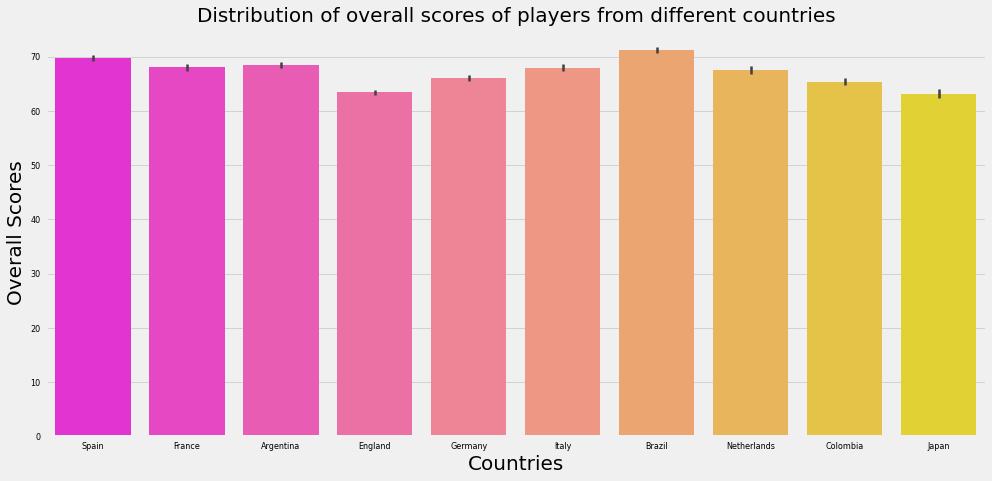

In [48]:
## Every Nations' Players and their overall scores

some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = "Countries", fontsize = 20)
ax.set_ylabel(ylabel = "Overall Scores", fontsize = 20)
ax.set_title(label = "Distribution of overall scores of players from different countries", fontsize = 20)
plt.show()

## Brazil and Spain has the maximum highest overall score valued players.

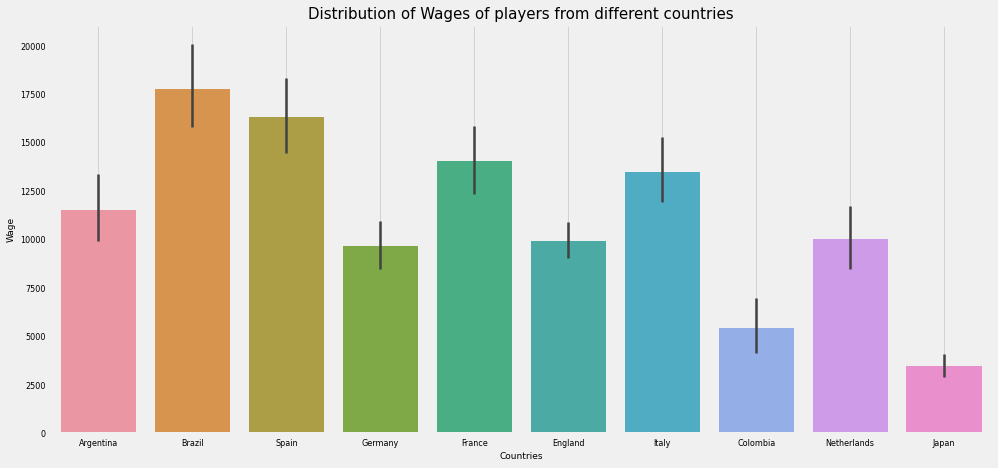

In [49]:
## Every Nations' Players and their wages

some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'])
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = "Wage", fontsize = 9)
ax.set_title(label = "Distribution of Wages of players from different countries", fontsize = 15)
plt.grid()
plt.show()

## Brazil and Spain has the maximum higher average salaries comapred to other popular countries.

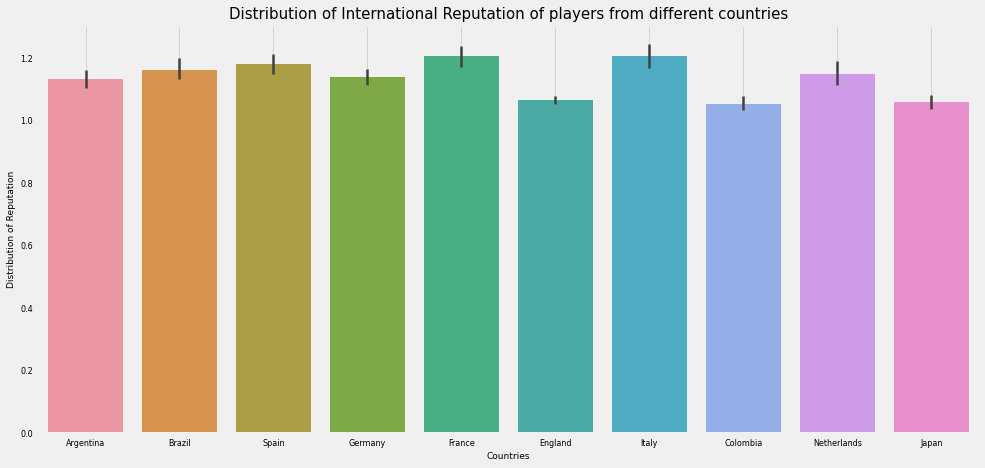

In [50]:
## Every Nations' Players and their International Reputation

some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['International Reputation'])
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = "Distribution of Reputation", fontsize = 9)
ax.set_title(label = "Distribution of International Reputation of players from different countries", fontsize = 15)
plt.grid()
plt.show()

## Players from Spain have a highest international reputation.

In [51]:
data['Club'].head(10)

0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
5                Chelsea
6            Real Madrid
7           FC Barcelona
8            Real Madrid
9        Atlético Madrid
Name: Club, dtype: object

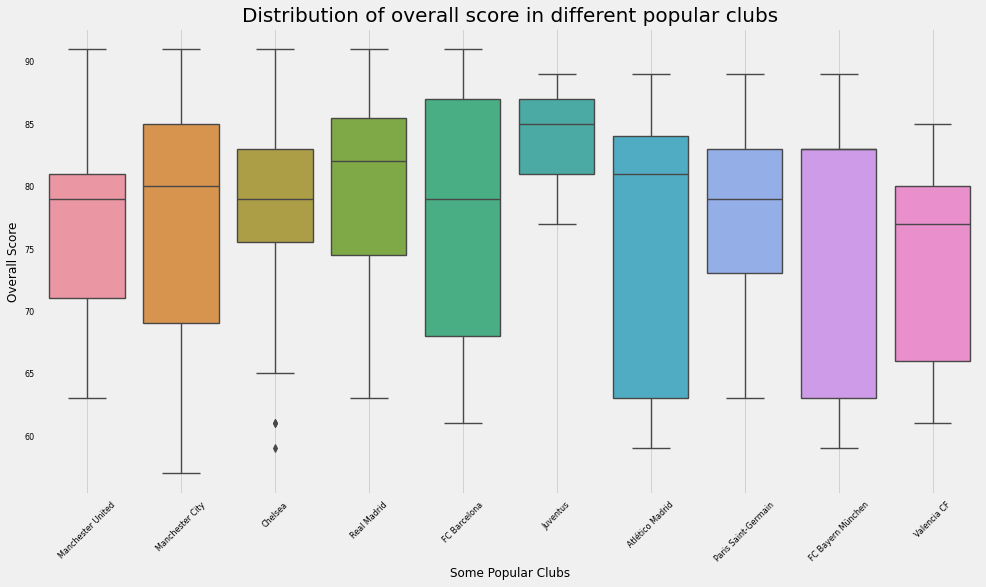

In [52]:
## Distribution of overall score in different popular clubs.

some_clubs = ('FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','Manchester United',
             'Manchester City','Chelsea','Atlético Madrid','FC Bayern München','Valencia CF')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'])
ax.set_xlabel(xlabel = "Some Popular Clubs", fontsize = 12)
ax.set_ylabel(ylabel = "Overall Score", fontsize = 12)
ax.set_title(label = "Distribution of overall score in different popular clubs", fontsize = 20)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

## Madrid and Barcelona have the highest overall distribution score which is around 75 to 85.

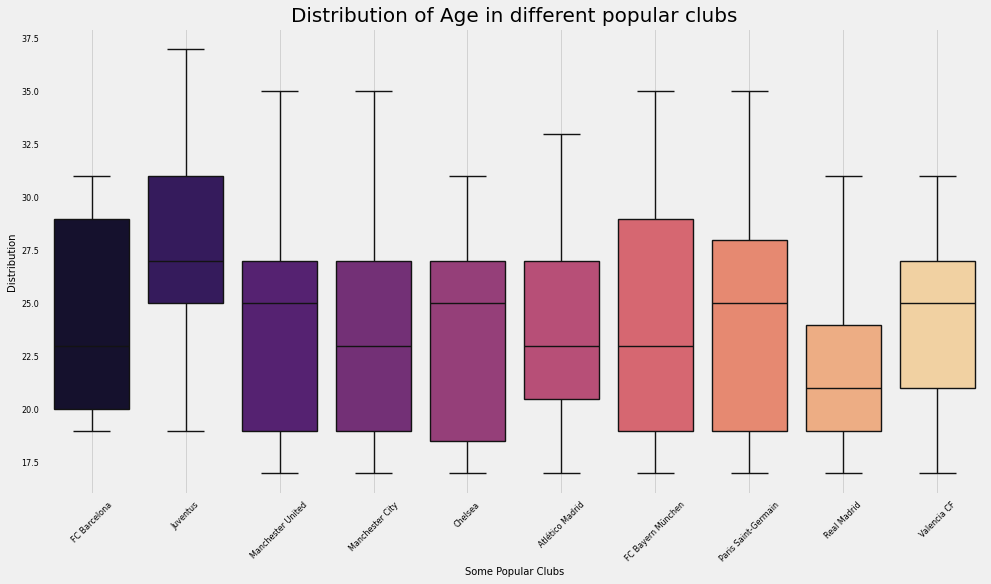

In [53]:
## Distribution of Ages in different popular clubs.

some_clubs = ('FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','Manchester United',
             'Manchester City','Chelsea','Atlético Madrid','FC Bayern München','Valencia CF')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Age']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = 'Club', y = 'Age', data = data_clubs, palette = 'magma')
ax.set_xlabel(xlabel = "Some Popular Clubs", fontsize = 10)
ax.set_ylabel(ylabel = "Distribution", fontsize = 10)
ax.set_title(label = "Distribution of Age in different popular clubs", fontsize = 20)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

## Barcelona has the maximum age distribution than any other club.

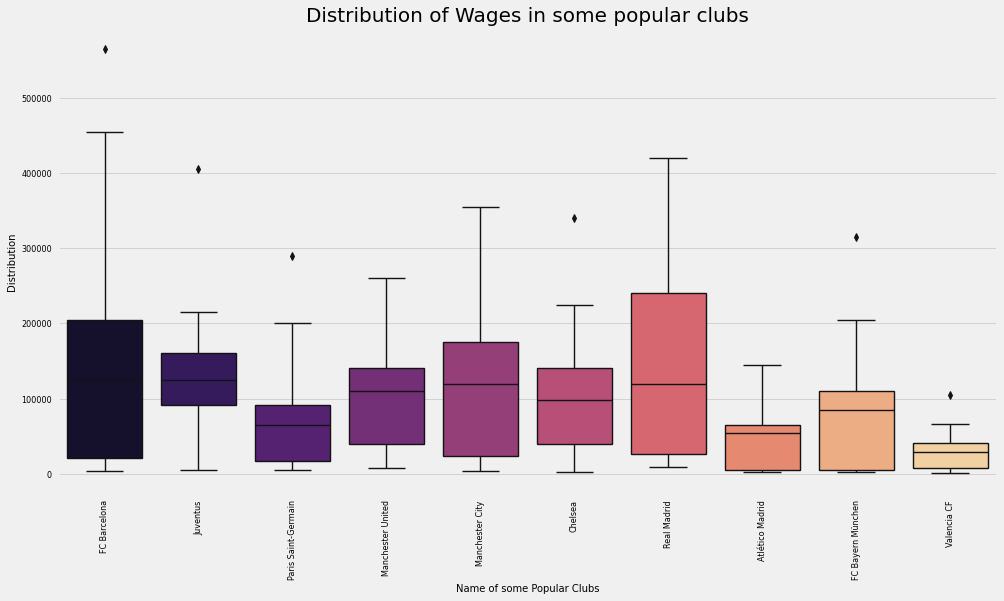

In [54]:
## Distribution of Wages in some popular clubs.

some_clubs = ('FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','Manchester United',
             'Manchester City','Chelsea','Atlético Madrid','FC Bayern München','Valencia CF')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_clubs, palette = 'magma')
ax.set_xlabel(xlabel = "Name of some Popular Clubs", fontsize = 10)
ax.set_ylabel(ylabel = "Distribution", fontsize = 10)
ax.set_title(label = "Distribution of Wages in some popular clubs", fontsize = 20)
plt.xticks(rotation = 90)
#plt.grid()
plt.show()

## Real Madrid, FC Barcelona have a higher wage distribution.

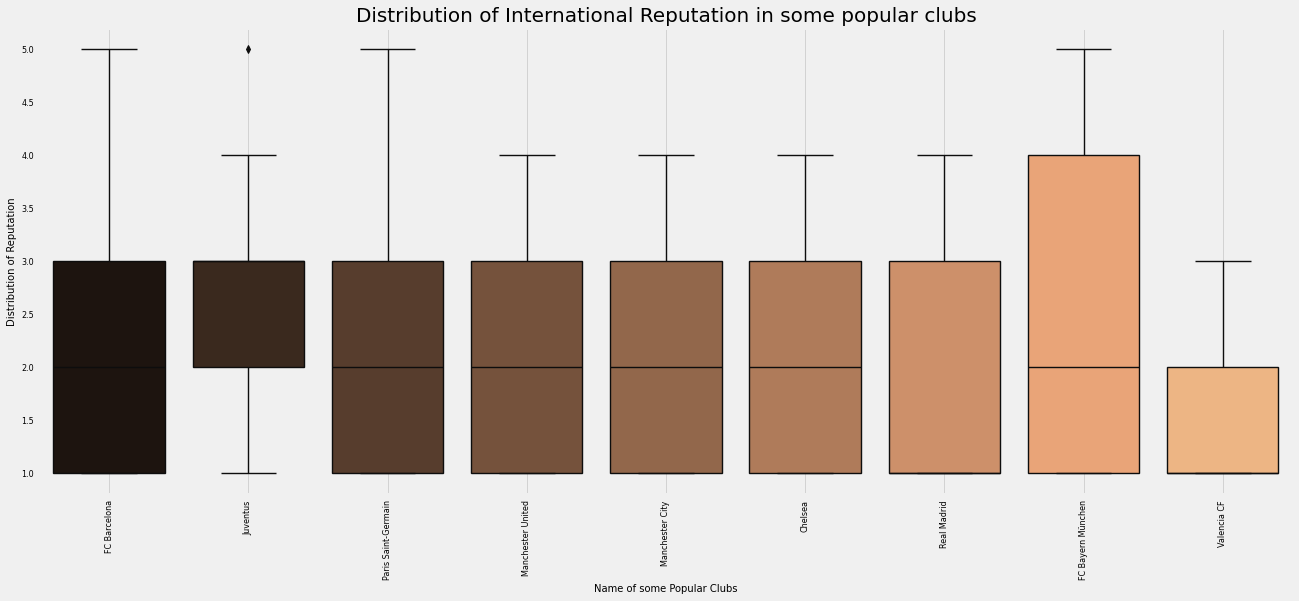

In [55]:
## Distribution of IOnternational Reputation in some popular clubs.

some_clubs = ('FC Barcelona','Real Madrid','Juventus','Paris Saint-Germain','Manchester United',
             'Manchester City','Chelsea','FC Celta','FC Bayern München','Valencia CF')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (20, 8)
ax = sns.boxplot(x = 'Club', y = 'International Reputation', data = data_clubs, palette = 'copper')
ax.set_xlabel(xlabel = "Name of some Popular Clubs", fontsize = 10)
ax.set_ylabel(ylabel = "Distribution of Reputation", fontsize = 10)
ax.set_title(label = "Distribution of International Reputation in some popular clubs", fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## FC Barcelona has tyhe maximum International Reputation than any other popular club.

### Query Analysis

#### Best player per each position with their age, club and nationality based on their Overall Scores.

In [56]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age',
                                                    'Club', 'Nationality', 'Overall']].sort_values(by = 'Overall',
                                                                ascending = False).style.background_gradient(cmap = 'pink')

## According to the overall scores Cristiano Ronaldo and L Messi are the best players.

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


#### Best Player for each Skill

In [57]:
data['General']>77

0         True
1         True
2         True
3        False
4         True
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: General, Length: 18207, dtype: bool

In [58]:
data[data['Passing'] > 90]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,10.0,€156.8M,73,78,78,91,71,62,90,82


In [59]:
## Lets analyze the skills of players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Rating', 'Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                                    ascending = False).head(10).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

### Let's Make a Function to get  the list of top 15 players from each countries

In [60]:
data['Nationality'].value_counts().index

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands',
       ...
       'Lebanon', 'Guam', 'Liberia', 'Mauritius', 'Kuwait', 'New Caledonia',
       'Fiji', 'São Tomé & Príncipe', 'United Arab Emirates', 'Botswana'],
      dtype='object', length=164)

In [61]:
## Lets make an interactive function for getting a report of the players country wise
## Lets make a function to see the list of top 15 players from each country

@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data [data['Nationality'] == country][['Name',
                            'Position', 'Overall', 'Potential']].sort_values(by = 'Overall', 
                                            ascending = False).head(15).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

### Let's Make a Function to get  the list of top 15 players from each Club.

In [62]:
data['Club'].value_counts().index[1:]

Index(['FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',
       'TSG 1899 Hoffenheim', 'Wolverhampton Wanderers', 'Eintracht Frankfurt',
       'Southampton', 'Valencia CF', 'Newcastle United',
       ...
       'Tromsø IL', 'Paraná', 'Internacional', 'Atlético Paranaense',
       'Ceará Sporting Club', 'América FC (Minas Gerais)', 'Fluminense',
       'Sligo Rovers', 'Limerick FC', 'Derry City'],
      dtype='object', length=651)

In [63]:
## Lets make an interactive function to get the list of top 15 players form each of the club

## Lets define a function
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data [data['Club'] == club][['Name', 'Jersey Number', 'Position', 'Overall', 'Nationality', 'Age',
                                       'Wage', 'Value', 'Contract Valid Until']].sort_values(by = 'Overall', 
                                            ascending = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

#### Youngest player from the FIFA 2019

In [64]:
## Finding 5 youngest players from dataset

youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


#### Eldest players from FIFA 2019

In [65]:
## Finding 15 eldest players from dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 
                            'Club', 'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [66]:
## The longest membership in tghe club

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace = True)
membership.style.background_gradient(cmap = 'Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,32
M. Al Shalhoub,Al Hilal,25
H. Sogahata,Kashima Antlers,25
M. Ogasawara,Kashima Antlers,25
S. Narazaki,Nagoya Grampus,24
M. Wölfli,BSC Young Boys,23
K. Kitamoto,Vissel Kobe,23
C. Källqvist,BK Häcken,22
Y. Endo,Gamba Osaka,22


In [67]:
## Top 10 Left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality', 'Overall',
                                          'Preferred Foot']].sort_values(by = 'Overall', 
                                ascending = False).head(10).style.background_gradient(cmap = 'bone')

,Name,Age,Club,Nationality,Overall,Preferred Foot
0,L. Messi,31,FC Barcelona,Argentina,94,Left
13,David Silva,32,Manchester City,Spain,90,Left
15,P. Dybala,24,Juventus,Argentina,89,Left
17,A. Griezmann,27,Atlético Madrid,France,89,Left
19,T. Courtois,26,Real Madrid,Belgium,89,Left
24,G. Chiellini,33,Juventus,Italy,89,Left
35,Marcelo,30,Real Madrid,Brazil,88,Left
37,H. Lloris,31,Tottenham Hotspur,France,88,Left
36,G. Bale,28,Real Madrid,Wales,88,Left
28,J. Rodríguez,26,FC Bayern München,Colombia,88,Left


In [68]:
## Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality', 'Overall',
                                          'Preferred Foot']].sort_values(by = 'Overall', 
                                ascending = False).head(10).style.background_gradient(cmap = 'copper')

,Name,Age,Club,Nationality,Overall,Preferred Foot
1,Cristiano Ronaldo,33,Juventus,Portugal,94,Right
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92,Right
3,De Gea,27,Manchester United,Spain,91,Right
4,K. De Bruyne,27,Manchester City,Belgium,91,Right
5,E. Hazard,27,Chelsea,Belgium,91,Right
6,L. Modrić,32,Real Madrid,Croatia,91,Right
7,L. Suárez,31,FC Barcelona,Uruguay,91,Right
8,Sergio Ramos,32,Real Madrid,Spain,91,Right
9,J. Oblak,25,Atlético Madrid,Slovenia,90,Right
10,R. Lewandowski,29,FC Bayern München,Poland,90,Right


### Analyzing the ball control and dribbling of FIFA players:- 

Goint to use the LM plot.

Mostv of the players who preferred their right foot have more ball control over dribbling compared to players who preferred their left foot.

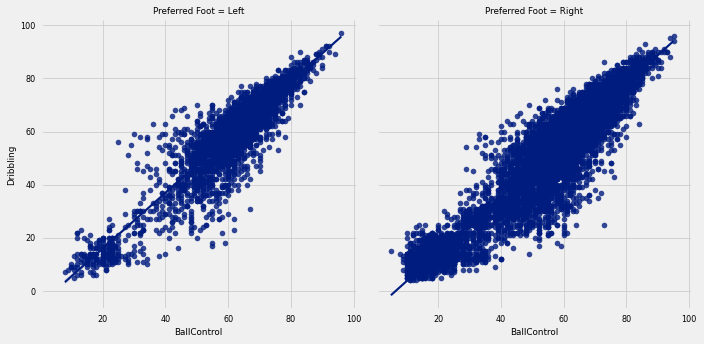

In [69]:
## Comparing the performance of left-footed and right-footed footballers
## Ballcontrol vs Dribbling

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

## Most of the players who preffred their right foot have more ball control over dribbling 
##compared to players who preferred their left foot.

###  ***END OF THE PROJECT***